# Adding Objects

In [1]:
import bpy
bpy.app.version_string # current blender version

'4.3.1'

In [3]:
from IPython.display import display, Image

def fresh_scene(keep_cube=False):
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    
    # Select all objects except cameras and optionally the default cube
    for obj in bpy.context.scene.objects:
        if obj.type == 'CAMERA':
            obj.select_set(False)
        elif obj.name == 'Cube' and keep_cube:
            obj.select_set(False)
        else:
            obj.select_set(True)
    
    bpy.ops.object.delete()
    
    # Add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

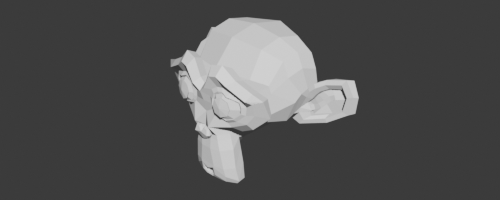

In [4]:
fresh_scene()
bpy.ops.mesh.primitive_monkey_add(size=2.5, location=(0, 0, 0))
render_result()

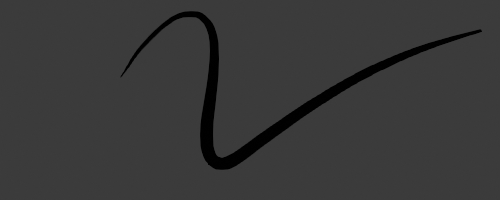

In [5]:
fresh_scene()
#bpy.ops.object.gpencil_add(location=(0, 0, 0), type='STROKE') # Blender 4.2
bpy.ops.object.grease_pencil_add(location=(0, 0, 0), type="STROKE") # Blender 4.3.1
gpencil_object = bpy.context.active_object
gpencil_object.scale = (3, 3, 3)
render_result()

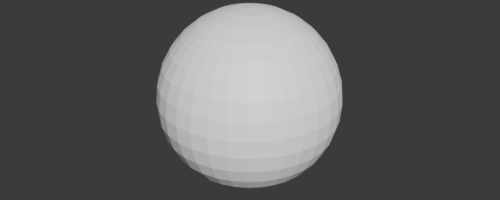

In [6]:
fresh_scene()
bpy.ops.mesh.primitive_uv_sphere_add(radius=1.5, location=(0, 0, 0)) 
render_result()

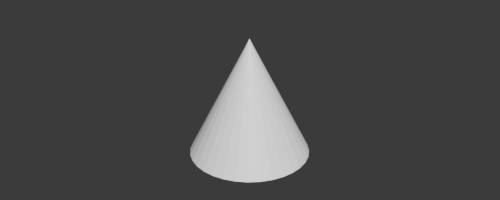

In [7]:
fresh_scene()
bpy.ops.mesh.primitive_cone_add(radius1=1, depth=2, location=(0, 0, 0))  
render_result()

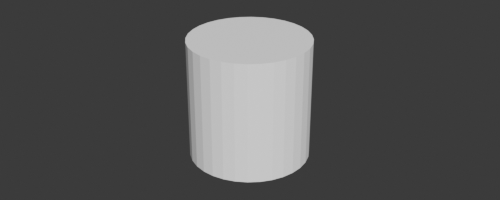

In [8]:
fresh_scene()
bpy.ops.mesh.primitive_cylinder_add(radius=1, depth=2, location=(0, 0, 0)) 
render_result()

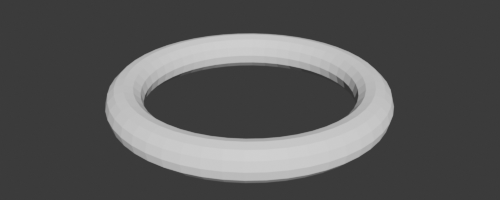

In [9]:
fresh_scene()
bpy.ops.mesh.primitive_torus_add(major_radius=2, minor_radius=0.3, location=(0,0, 0))
render_result()

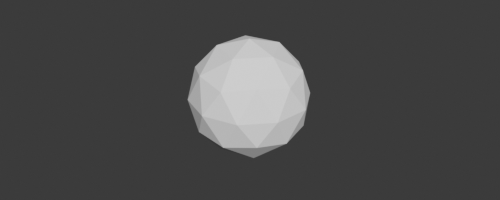

In [10]:
fresh_scene()
bpy.ops.mesh.primitive_ico_sphere_add(radius=1, location=(0, 0, 0)) 
render_result()

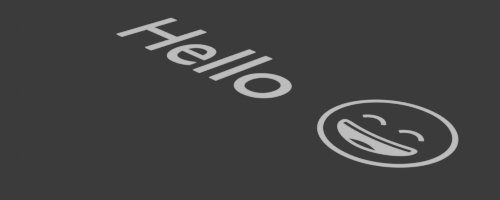

In [11]:
fresh_scene()
bpy.ops.object.text_add(location=(-4, 0, 0))
bpy.context.object.data.body = "Hello 😄"
bpy.context.object.scale = (2, 2, 2)
render_result()

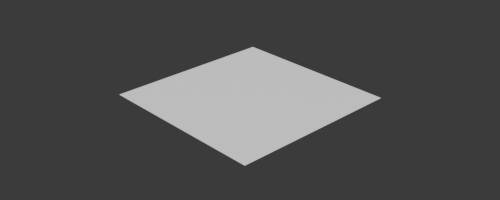

In [12]:
fresh_scene()
bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 0))  
render_result()

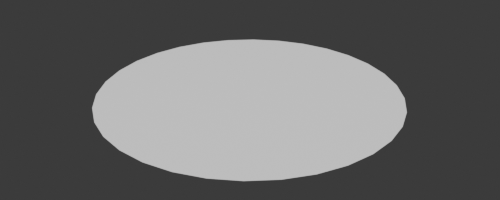

In [13]:
fresh_scene()
bpy.ops.mesh.primitive_circle_add(radius=2.5, location=(0, 0, 0), fill_type='NGON')
render_result()

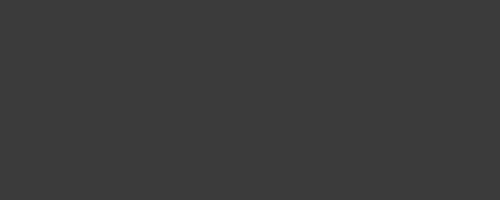

In [14]:
fresh_scene()
bpy.ops.object.empty_add(type='PLAIN_AXES', location=(4, 0, 0)) # (This is not shown in the image, but it is there :) )
render_result()

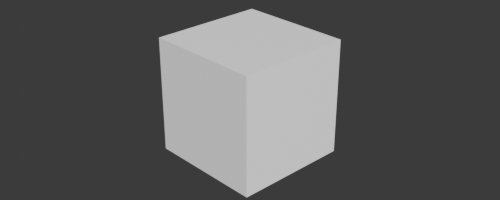

In [15]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
render_result()

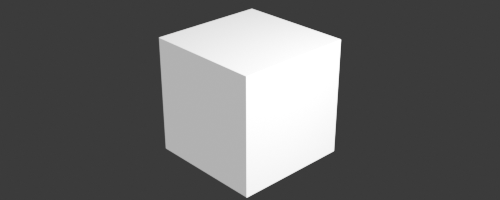

In [16]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
light = bpy.data.objects.new("Light", bpy.data.lights.new("Light", 'POINT'))
light.location = (3, 0, 2)
light.data.energy = 8000
bpy.context.collection.objects.link(light)
render_result()

# Applying Modifiers

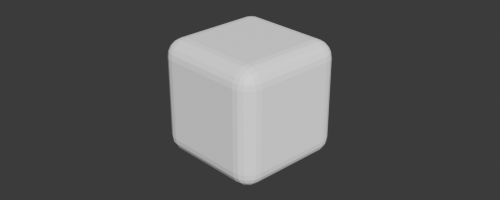

In [17]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
cube = bpy.context.active_object
bevel_modifier = cube.modifiers.new(name="Bevel", type='BEVEL')
bevel_modifier.width = 0.3  # Adjust the bevel width
bevel_modifier.segments = 5  # Number of segments for a smoother bevel

# Optionally apply the modifier if needed (not necessary for visualization)
# bpy.ops.object.modifier_apply(modifier="Bevel")

render_result()

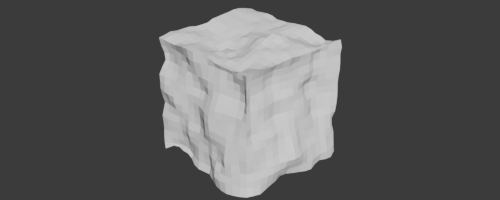

In [18]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create the subdivision surface modifier and change it to 'SIMPLE'
subsurf_modifier = cube.modifiers.new(name="Subdivision", type='SUBSURF')
subsurf_modifier.subdivision_type = 'SIMPLE'  # Change to 'SIMPLE' instead of 'CATMULL_CLARK'
subsurf_modifier.levels = 4  # Viewport subdivision level
subsurf_modifier.render_levels = 4  # Render subdivision level

displace_modifier = cube.modifiers.new(name="Displace", type='DISPLACE')
displace_modifier.strength = 0.5  # Adjust the displacement strength

texture = bpy.data.textures.new("DisplaceTexture", type='CLOUDS')
texture.noise_scale = 1  # Reduce the noise scale to make it more detailed
displace_modifier.texture = texture  # Assign the texture to the modifier

render_result()

# Settings

In [19]:
# current blender version
bpy.app.version_string

'4.3.1'

In [20]:
# current blender version
bpy.context.scene.render.engine

'BLENDER_EEVEE_NEXT'

In [21]:
bpy.context.scene.render.resolution_x, bpy.context.scene.render.resolution_y

(500, 200)

In [22]:
bpy.context.scene.name

'Scene'

In [23]:
bpy.context.active_object.name

'Cube'

In [24]:
bpy.context.active_object.location

Vector((0.0, 0.0, 0.0))

In [25]:
bpy.context.collection.objects.keys()

['Camera', 'Sun', 'Cube']

In [26]:
bpy.context.collection.objects.values()

[bpy.data.objects['Camera'], bpy.data.objects['Sun'], bpy.data.objects['Cube']]

# Using colors

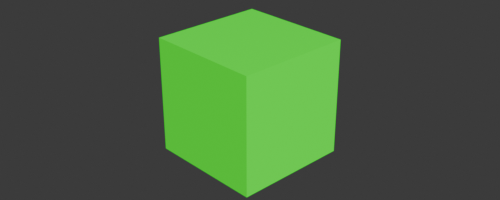

In [27]:
fresh_scene()

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a green material to the cube without using nodes
mat = bpy.data.materials.new(name="GreenMaterial")
mat.diffuse_color = (0, 1, 0, 1)  # Green color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)

render_result()

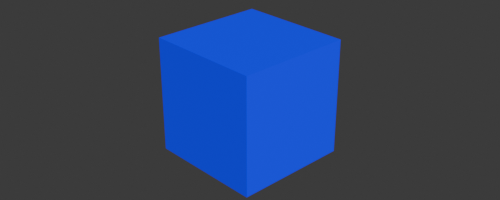

In [28]:
fresh_scene()

# colors with nodes

bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a blue material to the cube
mat = bpy.data.materials.new(name="BlueMaterial")
mat.use_nodes = True
bsdf = mat.node_tree.nodes.get('Principled BSDF')
bsdf.inputs['Base Color'].default_value = (0, 0, 1, 1)  # Blue color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)
render_result()

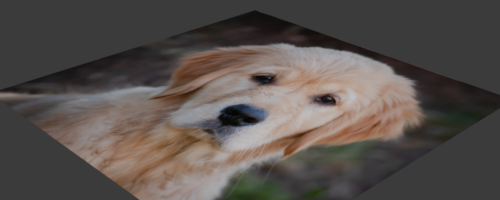

In [29]:
fresh_scene()

bpy.ops.mesh.primitive_plane_add(size=6, location=(0, 0, 0))
plane = bpy.context.object

material = bpy.data.materials.new(name="ImageMaterial")
material.use_nodes = True
bsdf = material.node_tree.nodes["Principled BSDF"]

tex_image = material.node_tree.nodes.new('ShaderNodeTexImage')
tex_image.image = bpy.data.images.load("cute_dog.jpg")

material.node_tree.links.new(bsdf.inputs['Base Color'], tex_image.outputs['Color'])
plane.data.materials.append(material)

render_result()

# Setting Up Shaders

Here's an example to generate the following shader tree  
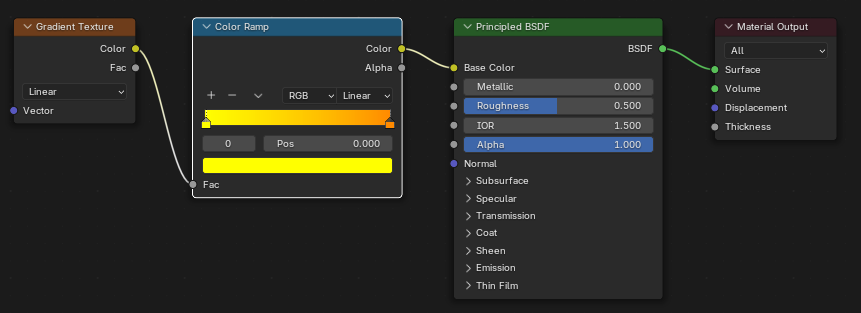  
It's quite a lot of code, so I would recommend to better set up nodes in the GUI.  

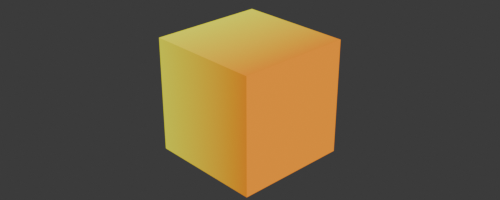

In [30]:
fresh_scene()

# Working with shader nodes is possible, but get's quite involved quite quickly

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create a new material for the cube
material = bpy.data.materials.new(name="YellowToOrangeGradient")
material.use_nodes = True
nodes = material.node_tree.nodes

# Clear default nodes
for node in nodes:
    nodes.remove(node)

# Add a Gradient Texture
gradient = nodes.new(type="ShaderNodeTexGradient")
gradient.gradient_type = "LINEAR"
gradient.location = (0, 0)

# Add a Color Ramp to control the gradient colors
ramp = nodes.new(type="ShaderNodeValToRGB")
ramp.color_ramp.interpolation = "LINEAR"
ramp.location = (300, 0)

ramp.color_ramp.elements[0].color = (1, 1, 0, 1)  # Yellow (R, G, B, A)
ramp.color_ramp.elements[1].color = (1, 0.3, 0, 1)  # Orange (R, G, B, A)

# Add the Principled BSDF shader
bsdf = nodes.new(type="ShaderNodeBsdfPrincipled")
bsdf.location = (600, 0)

# Create the output node
output = nodes.new(type="ShaderNodeOutputMaterial")
output.location = (900, 0)

# Link the nodes together
links = material.node_tree.links
links.new(gradient.outputs["Color"], ramp.inputs[0])
links.new(ramp.outputs["Color"], bsdf.inputs["Base Color"])
links.new(bsdf.outputs["BSDF"], output.inputs["Surface"])

# Apply the material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(material)

render_result()

# Setting up Geometry Nodes
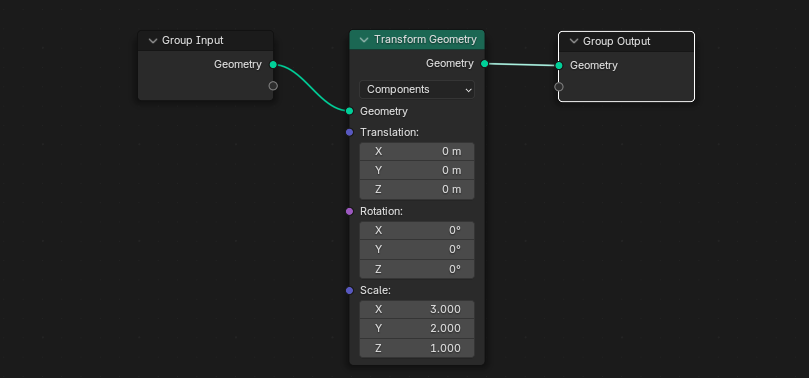

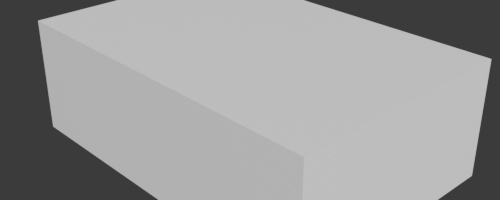

In [31]:
fresh_scene()

# Setting up geonodes is possible, but get's quite involved quite quickly

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Setup geometry nodes
geo_nodes = cube.modifiers.new(name="GeometryNodes", type="NODES")
node_group = bpy.data.node_groups.new("GeometryNodes", "GeometryNodeTree")
geo_nodes.node_group = node_group

# Create input/output and transformation nodes
inNode = node_group.nodes.new("NodeGroupInput")
inNode.location = (0, 0)

transformNode = node_group.nodes.new("GeometryNodeTransform")
transformNode.location = (300, 0)
transformNode.inputs["Scale"].default_value = (3, 2, 1)

outNode = node_group.nodes.new("NodeGroupOutput")
outNode.location = (600, 0)

# Define geometry input/output sockets
node_group.interface.new_socket(name="Geometry", in_out="INPUT", socket_type="NodeSocketGeometry")
node_group.interface.new_socket(name="Geometry", in_out="OUTPUT", socket_type="NodeSocketGeometry")

# Link the nodes together
node_group.links.new(inNode.outputs["Geometry"], transformNode.inputs["Geometry"])
node_group.links.new(transformNode.outputs["Geometry"], outNode.inputs["Geometry"])

render_result()

# Save File
You can any time also save your Blender file like this:

In [32]:
bpy.ops.wm.save_as_mainfile(filepath="scene.blend")

Info: Saved "scene.blend"


{'FINISHED'}

# Load file

In [33]:
fresh_scene()
bpy.ops.wm.open_mainfile(filepath="donut.blend")

{'FINISHED'}

# Choose render engine

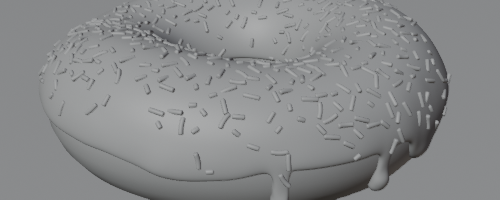

In [34]:
bpy.context.scene.render.engine = "BLENDER_WORKBENCH"
bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

render_result()

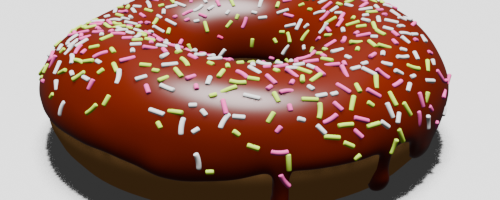

In [35]:
bpy.context.scene.render.engine = "BLENDER_EEVEE_NEXT"
render_result()

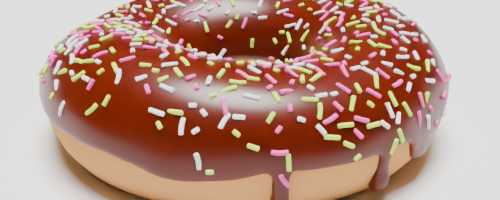

In [36]:
bpy.context.scene.render.engine = "CYCLES"
bpy.context.scene.cycles.samples = 10
render_result()

In [37]:
# Blender 4.3.1 does not output any messages anymore.
# optional: suppress text output (I did not find a better way yet)
#import sys 
#import os

#sys.stdout = open(os.devnull, 'w')
#sys.stderr = open(os.devnull, 'w')


# Manipulate geometry nodes

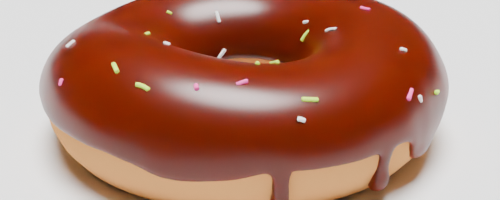

In [38]:
bpy.data.objects['ICINGLong'].modifiers["GeometryNodes"]["Socket_3"] = 0.1
bpy.context.object.data.update()
render_result()

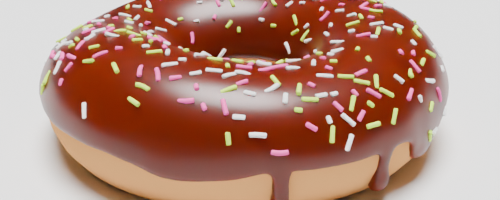

In [39]:
bpy.data.objects['ICINGLong'].modifiers["GeometryNodes"]["Socket_3"] = 2
bpy.context.object.data.update()
render_result()

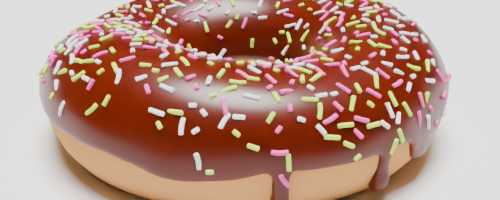

In [40]:
bpy.data.objects['ICINGLong'].modifiers["GeometryNodes"]["Socket_3"] = 10
bpy.context.object.data.update()
render_result()

# Manipulating shaders

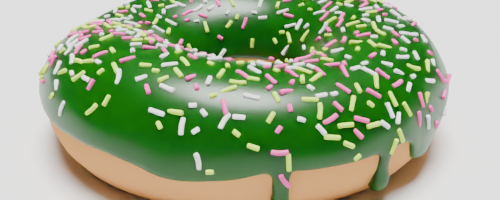

In [41]:
bpy.data.materials["Material.001"].node_tree.nodes["Principled BSDF"].inputs[0].default_value = (0, 0.1, 0, 1)
render_result()

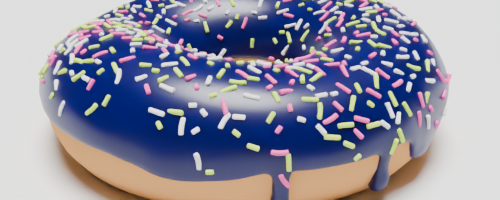

In [42]:
bpy.data.materials["Material.001"].node_tree.nodes["Principled BSDF"].inputs[0].default_value = (0, 0, 0.1, 1)
render_result()